In [1]:
import numpy as np
import pandas as pd
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM , Dense, GRU
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('toxic-comments.csv')

In [3]:
df.shape

(159571, 8)

In [4]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

Define target variable

In [33]:
toxicities = ['toxic', 'severe_toxic', 'obscene', 'threat',
            'insult', 'identity_hate']

In [6]:
def clean_text(text):
    text = text.lower() # Lower case
    text = re.sub(r"[^a-zA-Z0-9]+", " ", text)
    return text

In [7]:
df['comment_text'] = df['comment_text'].apply(clean_text)

In [8]:
df['comment_text'].head(5)

0    explanation why the edits made under my userna...
1    d aww he matches this background colour i m se...
2    hey man i m really not trying to edit war it s...
3     more i can t make any real suggestions on imp...
4    you sir are my hero any chance you remember wh...
Name: comment_text, dtype: object

Display Input and Output Statements

In [9]:
# Features and target preparation
comments = df['comment_text'].tolist()
targets = df[toxicities].values

In [10]:
targets

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [11]:
targets.shape

(159571, 6)

Prepare the data

In [12]:
# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(comments)
sequences = tokenizer.texts_to_sequences(comments)
padded_sequences = pad_sequences(sequences, maxlen=200)

In [13]:
padded_sequences

array([[   0,    0,    0, ..., 4539, 2252,  972],
       [   0,    0,    0, ...,  980,  577,  185],
       [   0,    0,    0, ...,    1,  732,  464],
       ...,
       [   0,    0,    0, ...,   12, 3463, 4381],
       [   0,    0,    0, ...,  153,   36,   10],
       [   0,    0,    0, ..., 1614, 2037,   89]])

Cross-validation

In [14]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, 
                                                    targets,
                                                    test_size=0.2,
                                                    random_state=0)

In [15]:
X_train.shape

(127656, 200)

In [16]:
X_test.shape

(31915, 200)

Build the Model

In [17]:
# Model Definition (Custom Architecture)
model = Sequential()
model.add(Embedding(5000, 120, input_length=200))
model.add(GRU(64))
model.add(Dense(6, activation= 'sigmoid'))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 120)          600000    
                                                                 
 gru (GRU)                   (None, 64)                35712     
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 636102 (2.43 MB)
Trainable params: 636102 (2.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
from keras.utils import plot_model

In [20]:
pip install pydot

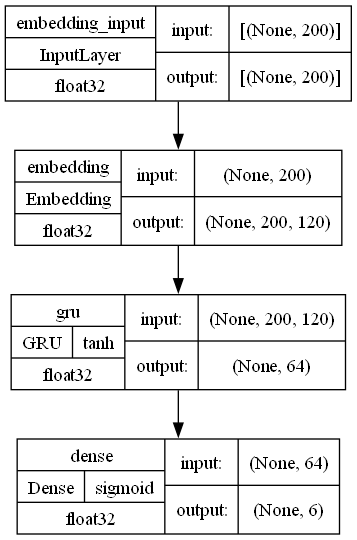

In [21]:
plot_model(model, show_dtype=True, show_layer_activations= True, show_layer_names= True, show_shapes= True)

Compile the Model

In [22]:
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

Train the Model

In [23]:
model.fit(X_train, y_train, epochs=3, batch_size= 32, validation_data=(X_test, y_test))

Epoch 1/3


3990/3990 [==============================] - 450s 112ms/step - loss: 0.0629 - accuracy: 0.9924 - val_loss: 0.0503 - val_accuracy: 0.9932
Epoch 2/3
3990/3990 [==============================] - 452s 113ms/step - loss: 0.0462 - accuracy: 0.9921 - val_loss: 0.0480 - val_accuracy: 0.9924
Epoch 3/3
3990/3990 [==============================] - 450s 113ms/step - loss: 0.0410 - accuracy: 0.9849 - val_loss: 0.0496 - val_accuracy: 0.9867


Predict New Data

In [95]:
new_comment = 'hate speech and an open thread of life'

In [96]:
comm = tokenizer.texts_to_sequences([clean_text(new_comment)])
comm_upadated = pad_sequences(comm, maxlen=200)
comm_upadated

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [97]:
comm_pred = model.predict(comm_upadated)[0]
comm_pred

1/1 [==============================] - 0s 45ms/step


array([0.30535236, 0.00209236, 0.0151692 , 0.00054284, 0.01986954,
       0.00768818], dtype=float32)

In [98]:
for toxicity, prob in zip(toxicities, comm_pred):
    print(f'{toxicity}: {prob:.2f}')

toxic: 0.31
severe_toxic: 0.00
obscene: 0.02
threat: 0.00
insult: 0.02
identity_hate: 0.01
